In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from collections import Counter


#Import all the models that I will use
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
import xgboost as xgb

In [2]:
column_input = """age
class of worker
detailed industry recode 
detailed occupation recode
education
wage per hour
enroll in edu inst last wk
marital stat
major industry code
major occupation code
race
hispanic origin
sex
member of a labor union
reason for unemploymen
full or part time employment stat
capital gains
capital losses
dividends from stocks
tax filer stat
region of previous residence
state of previous residence
detailed household and family stat
detailed household summary in household
instance weight
migration code-change in msa
migration code-change in reg
migration code-move within reg
live in this house 1 year ago
migration prev res in sunbelt
num persons worked for employer
family members under 18
country of birth father
country of birth mother
country of birth self
citizenship
own business or self employed
fill inc questionnaire for veteran's admin
veterans benefits
weeks worked in year
year
income"""

In [3]:
columns = column_input.split('\n')

In [4]:
census_train_df = pd.read_csv('census_income_learn.csv',names=columns,header=None)

In [5]:
census_test_df = pd.read_csv('census_income_test.csv',names=columns,header=None)

## EDA

In [6]:
census_train_df.shape,census_test_df.shape

((199523, 42), (99762, 42))

In [7]:
census_train_df.info()
census_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [8]:
census_train_df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [9]:
census_train_df.tail()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199522,32,Private,42,30,High school graduate,0,Not in universe,Never married,Medical except hospital,Other service,...,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94,- 50000.


In [10]:
census_train_df.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


### Drop duplicates from dataframes

In [11]:
census_train_df.drop_duplicates(inplace=True)
census_train_df = census_train_df.reset_index(drop=True)
census_train_df['income']=census_train_df['income'].str.strip()

In [12]:
census_test_df.drop_duplicates(inplace=True)
census_test_df = census_test_df.reset_index(drop=True)
census_test_df['income']=census_test_df['income'].str.strip()

In [13]:
#Removed Duplicates want to check the new shape of the dataframes
census_train_df.shape,census_test_df.shape

((196294, 42), (98879, 42))

### Want to change the income to binary values

In [16]:
income_dict ={'- 50000.':0,
             '50000+.':1}
census_train_df['income'] = census_train_df['income'].map(income_dict)

In [17]:
census_test_df['income'] = census_test_df['income'].map(income_dict)

### Explore the features more to find out what may be viable to drop

In [18]:
census_train_df['class of worker'].value_counts()

 Not in universe                   97029
 Private                           72021
 Self-employed-not incorporated     8442
 Local government                   7783
 State government                   4227
 Self-employed-incorporated         3264
 Federal government                 2925
 Never worked                        438
 Without pay                         165
Name: class of worker, dtype: int64

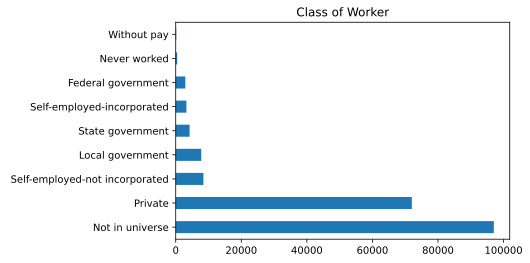

In [19]:
census_train_df['class of worker'].value_counts().plot(kind='barh')
plt.title('Class of Worker');
plt.savefig('class_of_worker.png')

In [20]:
census_train_df['education'].value_counts()

 High school graduate                      48374
 Children                                  44347
 Some college but no degree                27809
 Bachelors degree(BA AB BS)                19859
 7th and 8th grade                          7976
 10th grade                                 7539
 11th grade                                 6862
 Masters degree(MA MS MEng MEd MSW MBA)     6540
 9th grade                                  6193
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2125
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         817
Name: education, dtype: int64

In [21]:
census_train_df['enroll in edu inst last wk'].value_counts()

 Not in universe          183762
 High school                6853
 College or university      5679
Name: enroll in edu inst last wk, dtype: int64

In [22]:
census_train_df['major industry code'].value_counts()

 Not in universe or children            97467
 Retail trade                           17069
 Manufacturing-durable goods             9014
 Education                               8283
 Manufacturing-nondurable goods          6895
 Finance insurance and real estate       6145
 Construction                            5984
 Business and repair services            5651
 Medical except hospital                 4683
 Public administration                   4610
 Other professional services             4482
 Transportation                          4209
 Hospital services                       3964
 Wholesale trade                         3594
 Agriculture                             3021
 Personal services except private HH     2937
 Social services                         2547
 Entertainment                           1650
 Communications                          1181
 Utilities and sanitary services         1178
 Private household services               945
 Mining                           

In [23]:
census_train_df['country of birth father'].value_counts()

 United-States                   156037
 Mexico                            9948
 ?                                 6703
 Puerto-Rico                       2676
 Italy                             2212
 Canada                            1380
 Germany                           1356
 Dominican-Republic                1284
 Poland                            1210
 Philippines                       1152
 Cuba                              1121
 El-Salvador                        982
 China                              854
 England                            791
 Columbia                           614
 India                              579
 South Korea                        530
 Ireland                            508
 Jamaica                            461
 Vietnam                            457
 Guatemala                          443
 Japan                              391
 Portugal                           387
 Ecuador                            378
 Haiti                              351


In [24]:
census_train_df['hispanic origin'].value_counts()

 All other                    168803
 Mexican-American               8008
 Mexican (Mexicano)             7210
 Central or South American      3891
 Puerto Rican                   3306
 Other Spanish                  2476
 Cuban                          1122
 NA                              870
 Do not know                     305
 Chicano                         303
Name: hispanic origin, dtype: int64

In [25]:
census_train_df['full or part time employment stat'].value_counts()

 Children or Armed Forces              120632
 Full-time schedules                    40728
 Not in labor force                     26726
 PT for non-econ reasons usually FT      3322
 Unemployed full-time                    2310
 PT for econ reasons usually PT          1209
 Unemployed part- time                    842
 PT for econ reasons usually FT           525
Name: full or part time employment stat, dtype: int64

In [26]:
census_train_df['major occupation code'].value_counts()

 Not in universe                          97467
 Adm support including clerical           14836
 Professional specialty                   13940
 Executive admin and managerial           12495
 Other service                            12097
 Sales                                    11781
 Precision production craft & repair      10517
 Machine operators assmblrs & inspctrs     6377
 Handlers equip cleaners etc               4126
 Transportation and material moving        4020
 Farming forestry and fishing              3143
 Technicians and related support           3018
 Protective services                       1661
 Private household services                 780
 Armed Forces                                36
Name: major occupation code, dtype: int64

In [27]:
census_train_df['sex'].value_counts()

 Female    102400
 Male       93894
Name: sex, dtype: int64

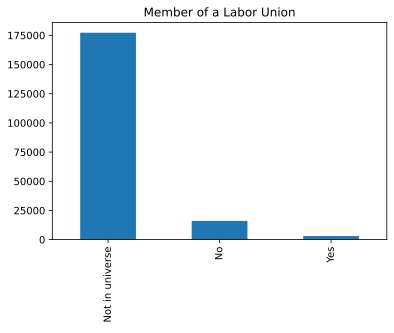

In [28]:
census_train_df['member of a labor union'].value_counts().plot(kind='bar')
plt.title('Member of a Labor Union');
plt.savefig('mem_lab_un.png')

In [29]:
census_train_df['reason for unemploymen'].value_counts()

 Not in universe          190226
 Other job loser            2038
 Re-entrant                 2018
 Job loser - on layoff       976
 Job leaver                  598
 New entrant                 438
Name: reason for unemploymen, dtype: int64

In [30]:
census_train_df['tax filer stat'].value_counts()

 Nonfiler                        71903
 Joint both under 65             67367
 Single                          37409
 Joint both 65+                   8326
 Head of household                7425
 Joint one under 65 & one 65+     3864
Name: tax filer stat, dtype: int64

In [31]:
census_train_df['detailed household and family stat'].value_counts()

 Householder                                        53242
 Child <18 never marr not in subfamily              47219
 Spouse of householder                              41670
 Nonfamily householder                              22205
 Child 18+ never marr Not in a subfamily            12016
 Secondary individual                                6109
 Other Rel 18+ ever marr not in subfamily            1953
 Grandchild <18 never marr child of subfamily RP     1839
 Other Rel 18+ never marr not in subfamily           1726
 Grandchild <18 never marr not in subfamily          1055
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              729
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel <18 never marr child of subfamily RP       653
 Other Rel 18+ spouse of subfamily RP                 638
 Child 18+ nev

In [32]:
census_train_df['detailed household summary in household'].value_counts()

 Householder                             75461
 Child under 18 never married            47318
 Spouse of householder                   41684
 Child 18 or older                       14416
 Other relative of householder            9651
 Nonrelative of householder               7585
 Group Quarters- Secondary individual      132
 Child under 18 ever married                47
Name: detailed household summary in household, dtype: int64

In [33]:
census_train_df['migration code-change in reg'].value_counts()

 ?                                 98015
 Nonmover                          81128
 Same county                        9779
 Different county same state        2792
 Not in universe                    1419
 Different region                   1178
 Different state same division       990
 Abroad                              530
 Different division same region      463
Name: migration code-change in reg, dtype: int64

In [34]:
census_train_df['migration code-move within reg'].value_counts()

 ?                               98015
 Nonmover                        81128
 Same county                      9779
 Different county same state      2792
 Not in universe                  1419
 Different state in South          972
 Different state in West           678
 Different state in Midwest        551
 Abroad                            530
 Different state in Northeast      430
Name: migration code-move within reg, dtype: int64

In [35]:
census_train_df['live in this house 1 year ago'].value_counts()

 Not in universe under 1 year old    99434
 Yes                                 81128
 No                                  15732
Name: live in this house 1 year ago, dtype: int64

#### Appears to be 5 keywords that define unknown columns
* Will replace those with NaN

In [36]:
unknown = [' ?',' Not in universe under 1 year old',' Not in universe',' All other',' Not in universe or children']
for i in unknown: 
    census_train_df.replace(i,np.nan,inplace=True)

In [37]:
census_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196294 entries, 0 to 196293
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         196294 non-null  int64  
 1   class of worker                             99265 non-null   object 
 2   detailed industry recode                    196294 non-null  int64  
 3   detailed occupation recode                  196294 non-null  int64  
 4   education                                   196294 non-null  object 
 5   wage per hour                               196294 non-null  int64  
 6   enroll in edu inst last wk                  12532 non-null   object 
 7   marital stat                                196294 non-null  object 
 8   major industry code                         98827 non-null   object 
 9   major occupation code                       98827 non-null   object 
 

#### Drop the columns with more than ~50% null values

In [38]:
column_with_nan = census_train_df.columns[census_train_df.isnull().any()]

In [39]:
nan_columns = []

In [40]:
for column in column_with_nan:
    if census_train_df[column].isnull().sum()*100.0/census_train_df.shape[0] > 50:
            print(column)
            nan_columns.append(column)


enroll in edu inst last wk
hispanic origin
member of a labor union
reason for unemploymen
region of previous residence
state of previous residence
migration code-change in msa
migration code-change in reg
migration code-move within reg
live in this house 1 year ago
migration prev res in sunbelt
family members under 18
fill inc questionnaire for veteran's admin


In [41]:
for column in column_with_nan:
    if census_train_df[column].isnull().sum()*100.0/census_train_df.shape[0] > 50:
            census_train_df.drop(column,1, inplace=True)

In [42]:
census_test_df = census_test_df.drop(columns=nan_columns)

In [43]:
census_test_df.shape,census_train_df.shape

((98879, 29), (196294, 29))

#### With these columns dropped I will now do another describe and also fill the NaN with Unknown

In [44]:
census_train_df = census_train_df.fillna('Unknown')

In [45]:
census_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196294 entries, 0 to 196293
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      196294 non-null  int64  
 1   class of worker                          196294 non-null  object 
 2   detailed industry recode                 196294 non-null  int64  
 3   detailed occupation recode               196294 non-null  int64  
 4   education                                196294 non-null  object 
 5   wage per hour                            196294 non-null  int64  
 6   marital stat                             196294 non-null  object 
 7   major industry code                      196294 non-null  object 
 8   major occupation code                    196294 non-null  object 
 9   race                                     196294 non-null  object 
 10  sex                             

## Data Balance

In [46]:
target_count = census_train_df['income'].value_counts()

In [47]:
# print class balance
print(f'-50000: {target_count[0]}')
print(f'50000+: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')

-50000: 183912
50000+: 12382
Proportion: 14.85 : 1
Percentage of Majority Class: 93.69


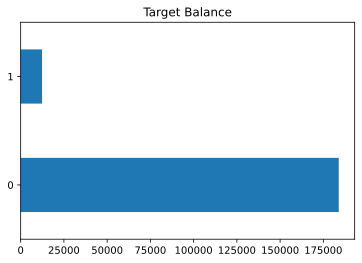

In [48]:
target_count.plot(kind='barh')
plt.title('Target Balance')
plt.savefig('target_balance.png');

## Categorical Value Encoding
* For this problem I will pd.getdummies. 
* In order to keep the number of columns down I think that encoding the top 10 and then the rest as others sounds like a good plan

In [49]:
X = census_train_df.drop(columns=['income'])
y = census_train_df['income']

In [50]:
census_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196294 entries, 0 to 196293
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      196294 non-null  int64  
 1   class of worker                          196294 non-null  object 
 2   detailed industry recode                 196294 non-null  int64  
 3   detailed occupation recode               196294 non-null  int64  
 4   education                                196294 non-null  object 
 5   wage per hour                            196294 non-null  int64  
 6   marital stat                             196294 non-null  object 
 7   major industry code                      196294 non-null  object 
 8   major occupation code                    196294 non-null  object 
 9   race                                     196294 non-null  object 
 10  sex                             

In [51]:
categorical_columns = """class of worker
education
marital stat
major industry code
major occupation code
race
sex
full or part time employment stat
tax filer stat
detailed household and family stat
detailed household summary in household
country of birth father
country of birth mother
country of birth self
citizenship"""

In [52]:
categorical_columns = categorical_columns.split('\n')

In [53]:
categorical_columns

['class of worker',
 'education',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'sex',
 'full or part time employment stat',
 'tax filer stat',
 'detailed household and family stat',
 'detailed household summary in household',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship']

In [54]:
'''
 9 distinct values for attribute 
 17 distinct values for attribute
 7 distinct values for attribute
 24 distinct values for attribute
 15 distinct values for attribute
 5 distinct values for attribute
 2 distinct values for attribute
 8 distinct values for attribute
 6 distinct values for attribute
 38 distinct values for attribute
 8 distinct values for attribute
 43 distinct values for attribute 
 43 distinct values for attribute
 43 distinct values for attribute
'''

'\n 9 distinct values for attribute \n 17 distinct values for attribute\n 7 distinct values for attribute\n 24 distinct values for attribute\n 15 distinct values for attribute\n 5 distinct values for attribute\n 2 distinct values for attribute\n 8 distinct values for attribute\n 6 distinct values for attribute\n 38 distinct values for attribute\n 8 distinct values for attribute\n 43 distinct values for attribute \n 43 distinct values for attribute\n 43 distinct values for attribute\n'

## Usually people under 18 do not have full time career my insitnct is to drop them but I will do some graphs to be sure

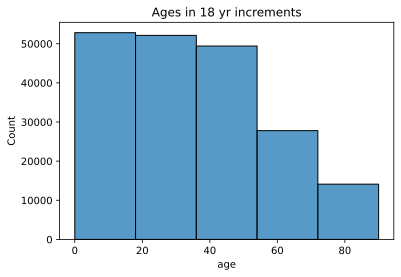

In [55]:
sns.histplot(data=census_train_df, x="age",binwidth=18)
plt.title('Ages in 18 yr increments')
plt.savefig('ages.png');

Around 50000 people in the dataframe are under 18

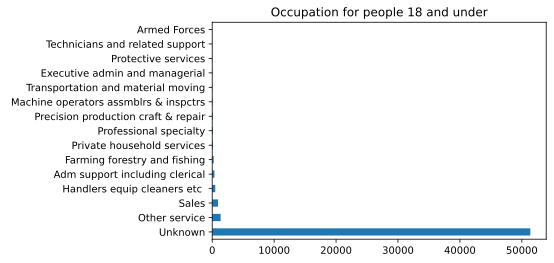

In [56]:
census_train_df[census_train_df['age']<=18]['major occupation code'].value_counts().plot(kind='barh',zorder=2)
plt.title('Occupation for people 18 and under')
plt.savefig('workforce.png');

Most people 18 and under have an unknown occupation which means they are more than likely unemployed

In [57]:
census_train_df['major occupation code'].value_counts()

Unknown                                   97467
 Adm support including clerical           14836
 Professional specialty                   13940
 Executive admin and managerial           12495
 Other service                            12097
 Sales                                    11781
 Precision production craft & repair      10517
 Machine operators assmblrs & inspctrs     6377
 Handlers equip cleaners etc               4126
 Transportation and material moving        4020
 Farming forestry and fishing              3143
 Technicians and related support           3018
 Protective services                       1661
 Private household services                 780
 Armed Forces                                36
Name: major occupation code, dtype: int64

In [58]:
census_train_df[census_train_df['age']<=18]['marital stat'].value_counts()

 Never married                      55124
 Married-civilian spouse present      115
 Separated                             29
 Divorced                              16
 Married-spouse absent                  9
 Married-A F spouse present             7
 Widowed                                5
Name: marital stat, dtype: int64

In [59]:
census_train_df[census_train_df['age']<=18]['income'].value_counts()

0    55302
1        3
Name: income, dtype: int64

In [60]:
census_train_df = census_train_df[census_train_df['age']>18]

In [61]:
census_train_df.reset_index(inplace=True,drop=True)

In [62]:
census_train_df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,race,...,num persons worked for employer,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,year,income
0,73,Unknown,0,0,High school graduate,0,Widowed,Unknown,Unknown,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,48,Private,40,10,Some college but no degree,1200,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,...,1,Philippines,United-States,United-States,Native- Born in the United States,2,2,52,95,0
3,42,Private,34,3,Bachelors degree(BA AB BS),0,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,...,6,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
4,28,Private,4,40,High school graduate,0,Never married,Construction,Handlers equip cleaners etc,White,...,4,United-States,United-States,United-States,Native- Born in the United States,0,2,30,95,0


### Explore categorical variables before encoding.
* Some have larger number of categories and this may provide an issue with creating encoding and dimensionality

In [63]:
census_train_df['class of worker'].value_counts()

 Private                           68535
Unknown                            45951
 Self-employed-not incorporated     8274
 Local government                   7654
 State government                   4173
 Self-employed-incorporated         3212
 Federal government                 2903
 Never worked                        147
 Without pay                         140
Name: class of worker, dtype: int64

In [64]:
census_train_df['education'].value_counts()

 High school graduate                      47762
 Some college but no degree                27377
 Bachelors degree(BA AB BS)                19857
 Masters degree(MA MS MEng MEd MSW MBA)     6540
 7th and 8th grade                          6314
 Associates degree-occup /vocational        5356
 10th grade                                 4815
 11th grade                                 4614
 Associates degree-academic program         4363
 9th grade                                  3462
 5th or 6th grade                           3219
 Prof school degree (MD DDS DVM LLB JD)     1793
 1st 2nd 3rd or 4th grade                   1785
 12th grade no diploma                      1667
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         802
Name: education, dtype: int64

In [65]:
census_train_df['major occupation code'].value_counts()

Unknown                                   46098
 Adm support including clerical           14474
 Professional specialty                   13818
 Executive admin and managerial           12468
 Sales                                    10849
 Other service                            10738
 Precision production craft & repair      10418
 Machine operators assmblrs & inspctrs     6294
 Transportation and material moving        3976
 Handlers equip cleaners etc               3633
 Technicians and related support           3004
 Farming forestry and fishing              2902
 Protective services                       1634
 Private household services                 651
 Armed Forces                                32
Name: major occupation code, dtype: int64

In [66]:
## For countries with more than 10 columns create the last column as other 

In [67]:
len(census_train_df['major occupation code'].unique())

15

In [68]:
top_10 = census_train_df['major occupation code'].value_counts().iloc[:10]
mask = census_train_df['major occupation code'].isin(top_10.index)
census_train_df['major occupation code'][~mask] ='major occupation code'+ "others"

In [69]:
census_train_encoded_df = census_train_df

In [70]:
census_train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140989 entries, 0 to 140988
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      140989 non-null  int64  
 1   class of worker                          140989 non-null  object 
 2   detailed industry recode                 140989 non-null  int64  
 3   detailed occupation recode               140989 non-null  int64  
 4   education                                140989 non-null  object 
 5   wage per hour                            140989 non-null  int64  
 6   marital stat                             140989 non-null  object 
 7   major industry code                      140989 non-null  object 
 8   major occupation code                    140989 non-null  object 
 9   race                                     140989 non-null  object 
 10  sex                             

In [ ]:
for col in categorical_columns:
    if len(census_train_df[col]) > 10 :
        top_ten = census_train_df[col].value_counts().iloc[:10]
        mask = census_train_df[col].isin(top_ten.index)
        census_train_df[col][~mask] = "others"
        dummies = pd.get_dummies(census_train_df[col],prefix = col)
        census_train_encoded_df = pd.concat([census_train_encoded_df, dummies], axis=1)
        census_train_encoded_df = census_train_encoded_df.drop(columns=[col])
    else:
        dummies = pd.get_dummies(census_train_df[col])
        census_train_encoded_df = pd.concat([census_train_encoded_df, dummies], axis=1)
        census_train_encoded_df = census_train_encoded_df.drop(columns=[col])

        

In [74]:
census_train_encoded_df.head()       

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,...,citizenship_ Native- Born in the United States,class of worker_ Federal government,class of worker_ Local government,class of worker_ Never worked,class of worker_ Private,class of worker_ Self-employed-incorporated,class of worker_ Self-employed-not incorporated,class of worker_ State government,class of worker_ Without pay,class of worker_Unknown
0,73,0,0,0,0,0,0,1700.09,0,0,...,1,0,0,0,0,0,0,0,0,1
1,58,4,34,0,0,0,0,1053.55,1,0,...,1,0,0,0,0,0,1,0,0,0
2,48,40,10,1200,0,0,0,162.61,1,2,...,1,0,0,0,1,0,0,0,0,0
3,42,34,3,0,5178,0,0,1535.86,6,0,...,1,0,0,0,1,0,0,0,0,0
4,28,4,40,0,0,0,0,898.83,4,0,...,1,0,0,0,1,0,0,0,0,0


In [73]:
census_train_encoded_df.isnull().values.any()

False

In [93]:
census_train_encoded_df.to_csv('census_encoded.csv')